# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    time.sleep(1) 
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}q={city}&appid={weather_api_key}&units=imperial'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        w_response = requests.get(city_url)
        city_weather = w_response.json()
           
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
       
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
   

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | tynda
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | acapulco de juarez
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | balti
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | necochea
Processing Record 11 of Set 1 | bovril
Processing Record 12 of Set 1 | prado
Processing Record 13 of Set 1 | phanom thuan
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | sal rei
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | kapa'a
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | akobo
Processing Record 21 of Set 1 | chibougamau
Processing Record 22 of Set 1 | trairi
Processing Record 23 of Set 1 | ronge

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,41.54,80,100,16.31,TF,1714094137
1,badger,64.8000,-147.5333,61.05,28,0,1.01,US,1714094139
2,tynda,55.1667,124.7167,24.82,68,98,15.39,RU,1714094140
3,ushuaia,-54.8000,-68.3000,38.86,87,0,2.30,AR,1714093989
4,acapulco de juarez,16.8634,-99.8901,84.02,70,0,10.36,MX,1714094143


In [87]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [88]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,40.01,66,69,18.41,TF,1714018043
1,arkalyk,50.2486,66.9114,46.87,42,100,24.74,KZ,1714017750
2,ixtapa,20.7000,-105.2000,76.23,94,0,3.44,MX,1714018046
3,itaituba,-4.2761,-55.9836,73.92,100,100,0.20,BR,1714018151
4,ilulissat,69.2167,-51.1000,32.02,93,100,5.75,GL,1714017754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

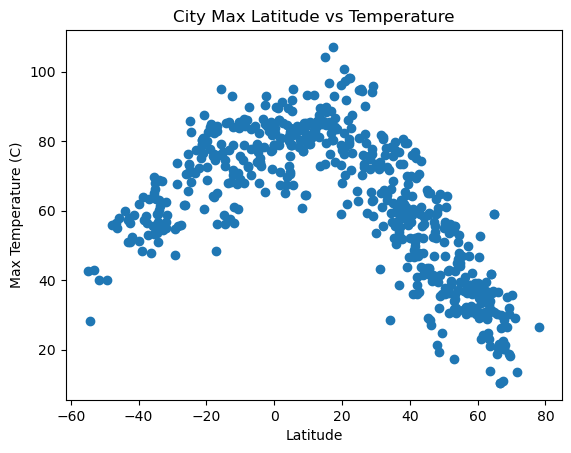

In [73]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

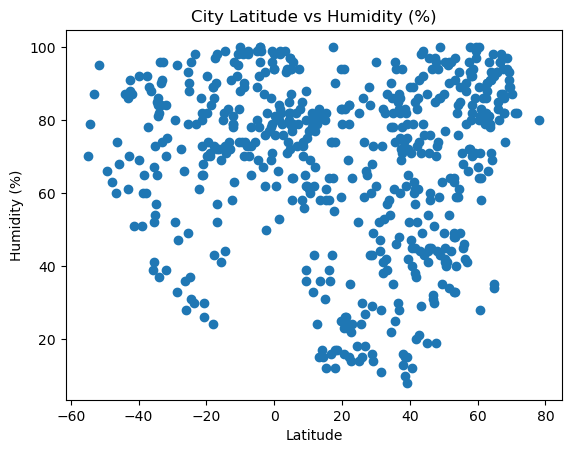

In [74]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

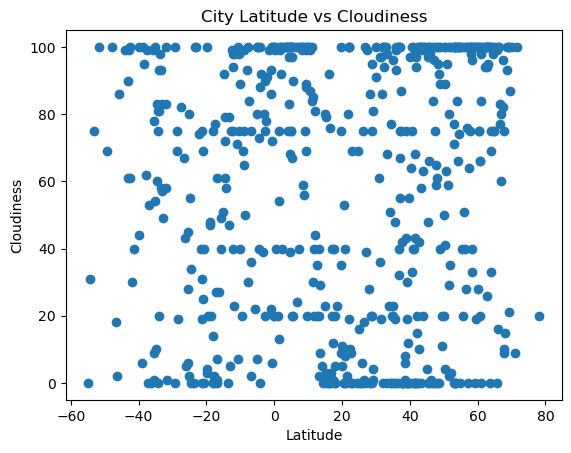

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

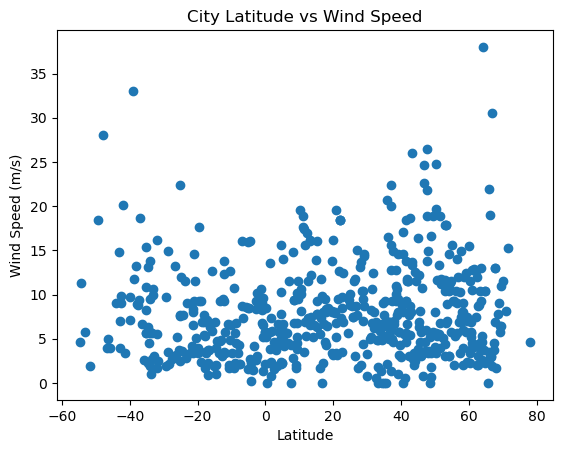

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arkalyk,50.2486,66.9114,46.87,42,100,24.74,KZ,1714017750
2,ixtapa,20.7000,-105.2000,76.23,94,0,3.44,MX,1714018046
4,ilulissat,69.2167,-51.1000,32.02,93,100,5.75,GL,1714017754
5,kaa-khem,51.6833,94.7333,30.40,54,80,11.23,RU,1714017851
6,badger,64.8000,-147.5333,58.91,34,75,10.36,US,1714018052


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,40.01,66,69,18.41,TF,1714018043
3,itaituba,-4.2761,-55.9836,73.92,100,100,0.20,BR,1714018151
7,bredasdorp,-34.5322,20.0403,59.02,85,83,2.26,ZA,1714018054
8,adamstown,-25.0660,-130.1015,73.18,90,2,22.35,PN,1714018055
9,lae,-6.7221,146.9847,83.59,65,36,7.36,PG,1714018057


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8585628311858946


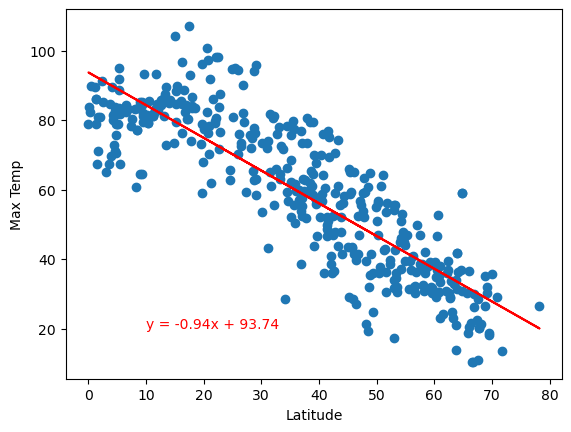

In [79]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))


plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (10, 20),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

The r-value is 0.7461582105392797


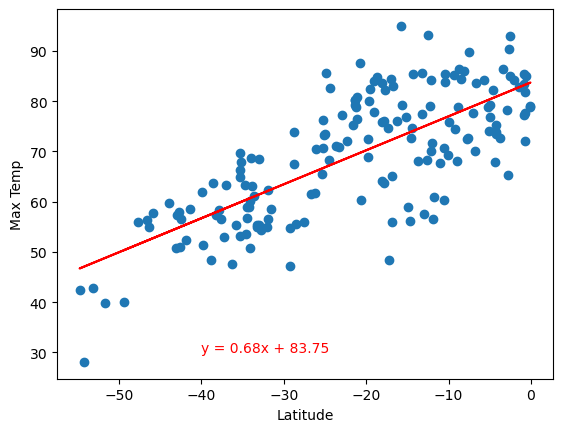

In [80]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))


plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (-40, 30),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.1606371463319013


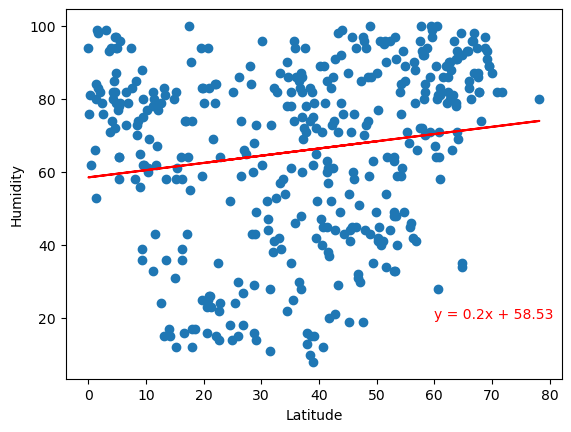

In [81]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))



plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (60, 20),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.20426496293123295


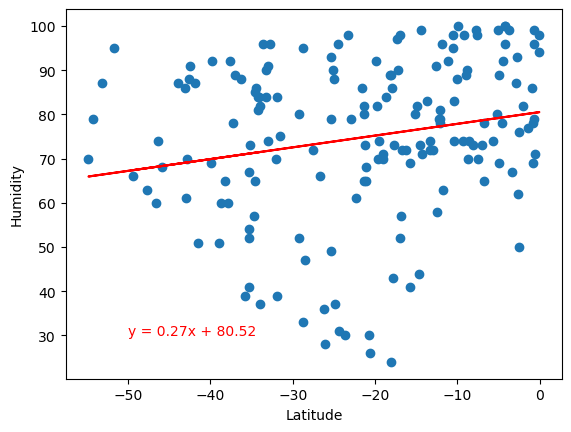

In [82]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))



plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (-50, 30),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.09803704045090914


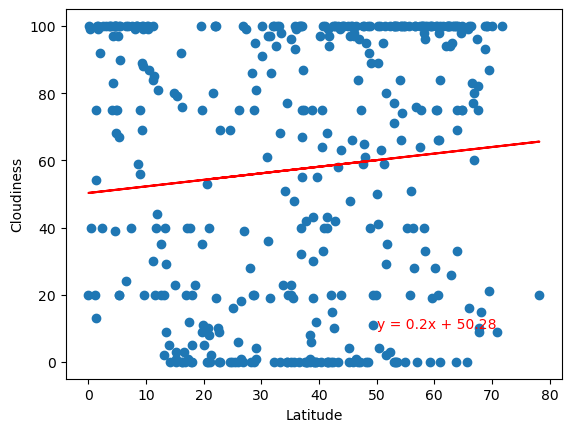

In [83]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]


slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))



plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (50, 10),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.04447118894695394


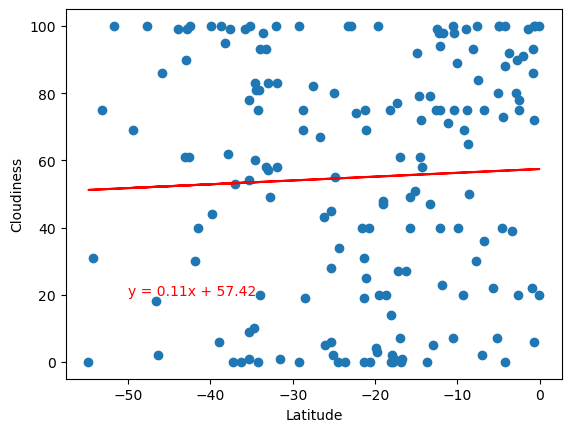

In [84]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]


slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))



plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (-50, 20),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.09271227685440427


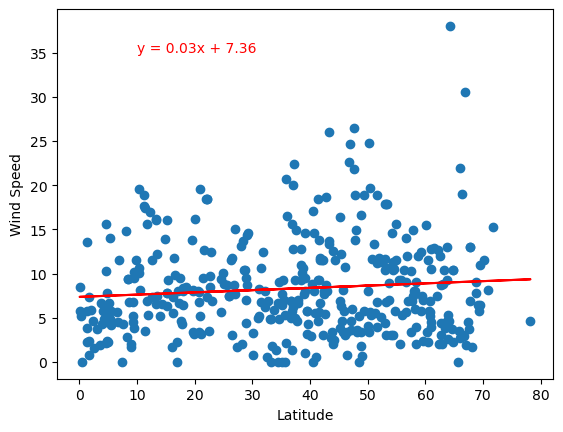

In [85]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))



plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (10, 35),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.23215729344380326


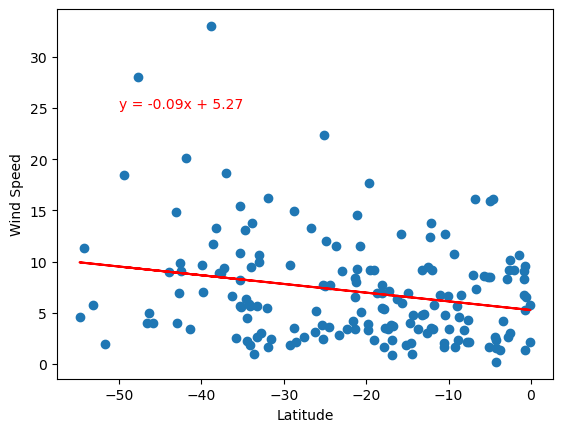

In [86]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]


slope = linregress(x_value, y_value)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_line = x_value * slope + intercept
regress_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_line, "r")
plt.annotate(regress_eq, (-50, 25),fontsize = 10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE